# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [200]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [201]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

<AxesSubplot:xlabel='Months_encoded'>

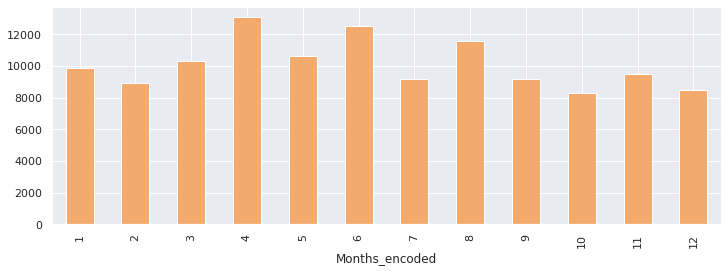

In [202]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
a = pd.DataFrame(fitbit.groupby("Months_encoded")['Steps'].mean())
a = a.reset_index()
fitbit.groupby(["Months_encoded"])["Steps"].mean().plot(kind ='bar', color='#F2AB6D', figsize = (12,4))

([<matplotlib.axis.XTick at 0x7fa18f68aa00>,
 [Text(0, 0, 'Weekend'), Text(1, 0, 'Week')])

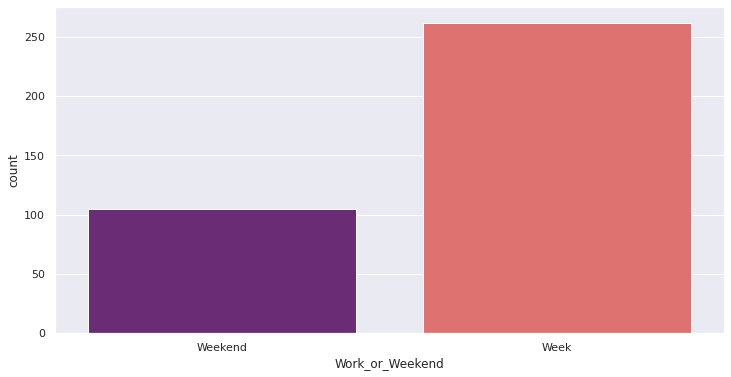

In [203]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
sns.countplot(x=fitbit.Work_or_Weekend, palette="magma")
plt.xticks([0,1],["Weekend","Week"],rotation=0)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

<AxesSubplot:xlabel='Minutes Lightly Active', ylabel='Steps'>

<AxesSubplot:xlabel='Minutes Very Active', ylabel='Steps'>

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Steps'>

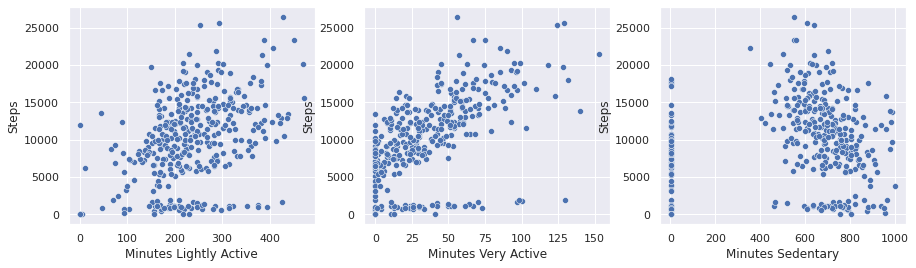

In [233]:
# your code here
b = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
for y , z in enumerate(b):
    display(sns.scatterplot(x=fitbit[z], y=fitbit["Steps"], data=fitbit, ax=axs[y]))

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [205]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [206]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [207]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(exclude=object)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [208]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [209]:
# your code here
sns.set_style(style="whitegrid")
sns.set(rc={"figure.figsize": (12.,6.)})

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

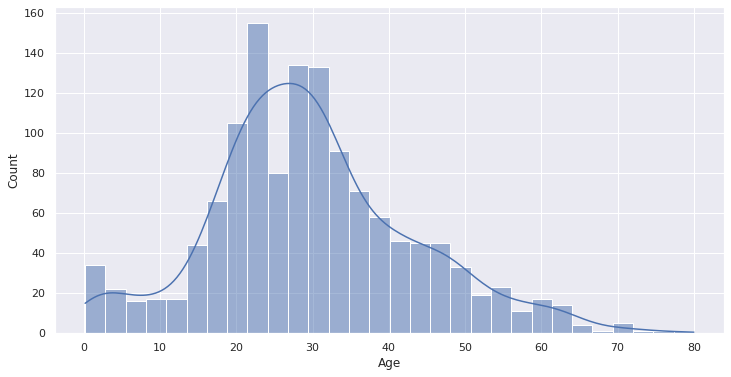

In [210]:
# your code here
sns.histplot(data=titanic, x="Age", kde= True)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

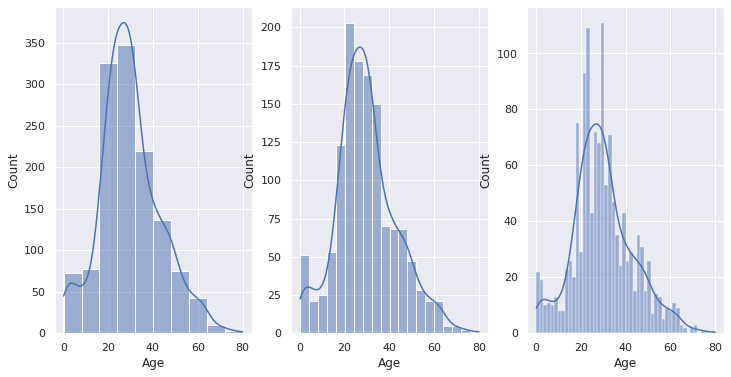

In [211]:
# your code here
fig, axs = plt.subplots(1,3)
sns.histplot(data=titanic, x="Age", kde= True, bins=10, ax=axs[0])
sns.histplot(data=titanic, x="Age", kde= True, bins=20, ax=axs[1])
sns.histplot(data=titanic, x="Age", kde= True, bins=50, ax=axs[2])


#### How does the bin size affect your plot?

In [212]:
"""
your comments here
max count goes down because intervals get shorter
"""

'\nyour comments here\nmax count goes down because intervals get shorter\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Density'>

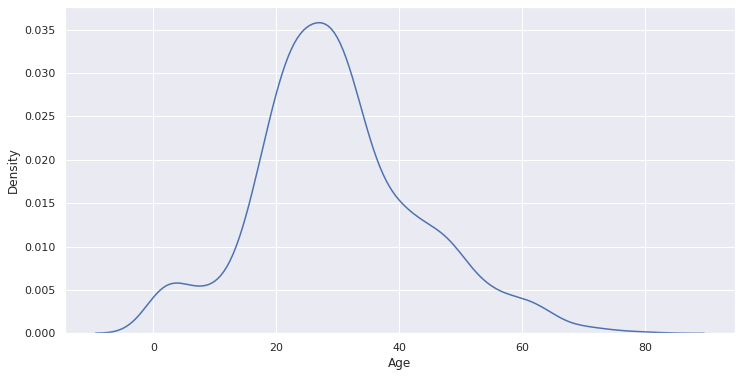

In [213]:
# your code here
sns.kdeplot(x=titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:xlabel='Gender'>

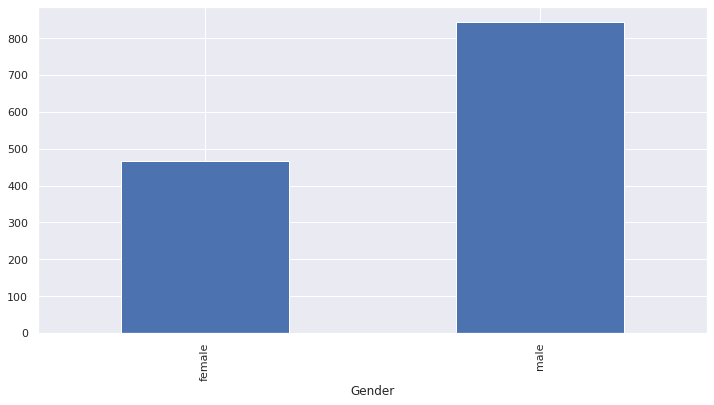

In [214]:
# Method 1 - matplotlib
# your code here
titanic.groupby(["Gender"])["Gender"].count().plot(kind="bar")

<AxesSubplot:xlabel='Gender', ylabel='count'>

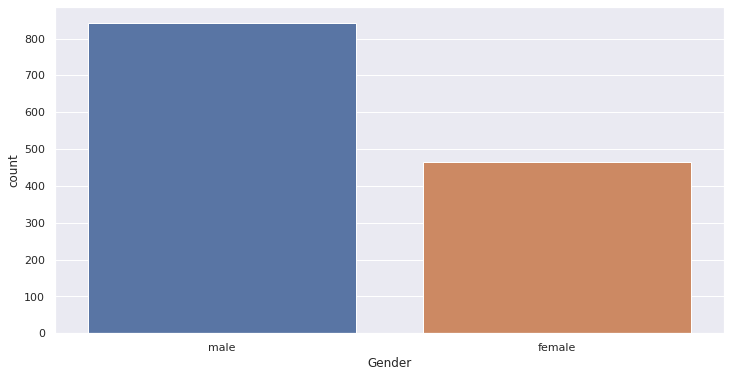

In [215]:
# Method 2 - seaborn
# your code here
sns.countplot(data=titanic, x="Gender")

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass'>

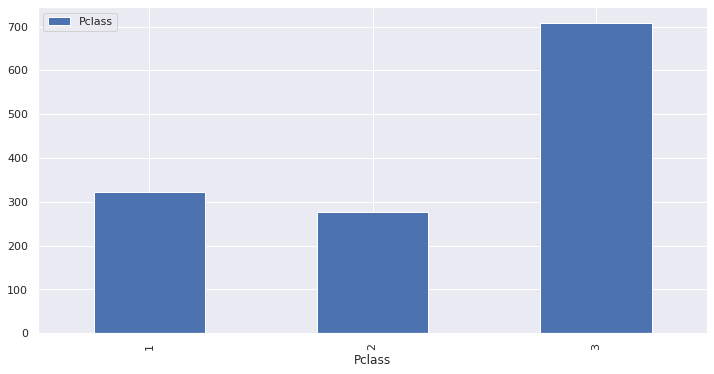

In [239]:
# your code here
c = titanic.groupby("Pclass").agg({"Pclass": "count"})
c.plot(kind="bar")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

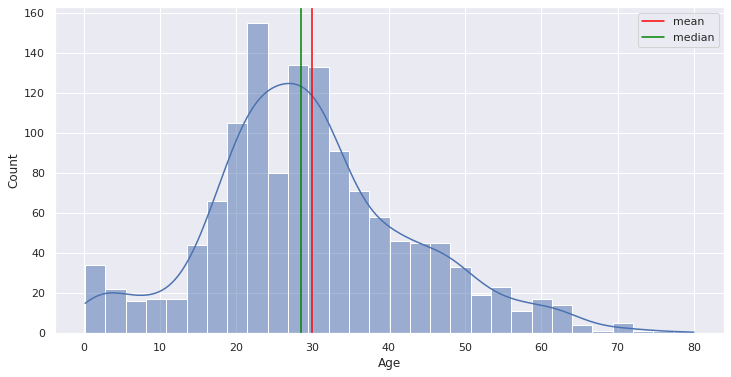

In [241]:
# your code here
graf = sns.histplot(x=titanic.Age, kde=True)
graf.axvline(x=titanic.Age.dropna().mean(), c="red", label="mean")
graf.axvline(x=titanic.Age.dropna().median(), c="green", label="median")
plt.legend()

In [218]:
"""
your comments here
"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [219]:
"""
your comments here
the distribution of age and the most common age
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

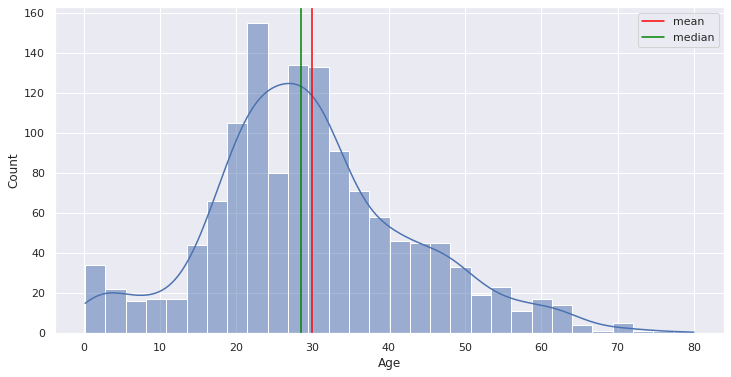

In [243]:
# your code here
graf = sns.histplot(x=titanic.Age, kde=True)
graf.axvline(x=titanic.Age.dropna().mean(), c="red", label="mean")
graf.axvline(x=titanic.Age.dropna().median(), c="green", label="median")
plt.legend()

#### What additional information does the last plot provide about feature `Age`?

In [221]:
"""
your comments here
The same
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

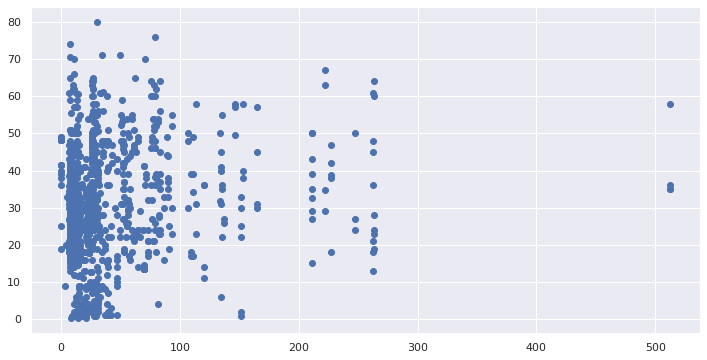

In [245]:
# Method 1 - matplotlib
# your code here
plt.scatter(x=titanic["Fare"], y=titanic["Age"])

<AxesSubplot:xlabel='Fare', ylabel='Age'>

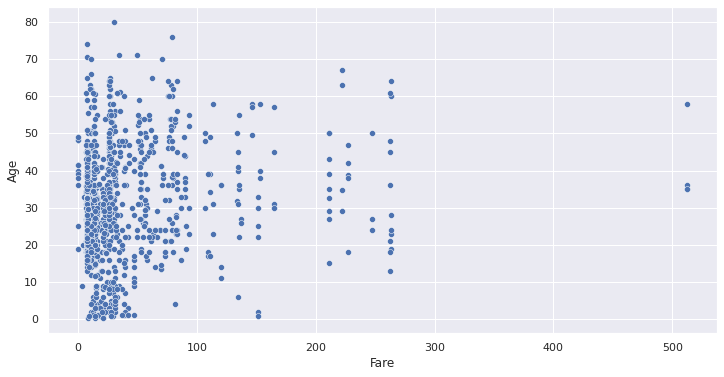

In [244]:
# Method 2 - seaborn
# your code here
sns.scatterplot(x="Fare", y="Age", data=titanic)

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

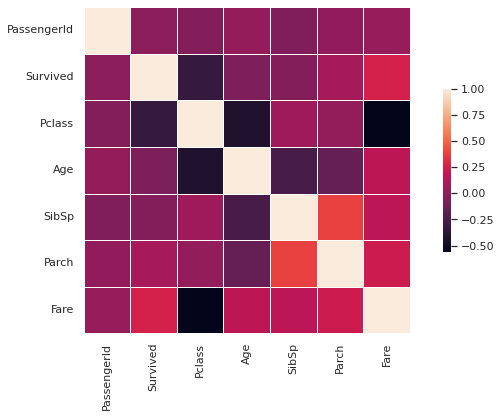

In [248]:
# your code here
corr = titanic.corr()
sns.heatmap(corr,
            vmax=1,
            square=True,
            linewidth=.5,
            cbar_kws={"shrink": .5} 

)

#### What are the most correlated features?

In [225]:
"""
your comments here
Fare and Pclass, and Parch andSibSp
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

([<matplotlib.axis.XTick at 0x7fa175489d30>,
 [Text(0, 0, 'Average Pclass1'),
  Text(1, 0, 'Average Pclass2'),
  Text(2, 0, 'Average Pclass3')])

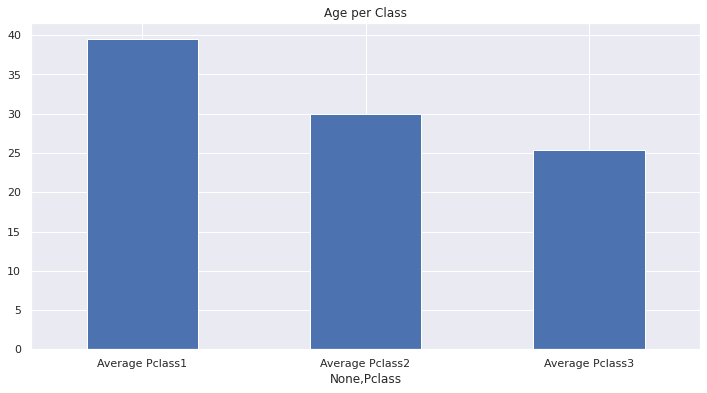

In [267]:
# your code here
q = titanic.groupby(["Pclass"]).agg({"Age": "mean"}).unstack()
q
dat.plot(kind="bar", title = 'Age per Class')
plt.xticks([0,1,2],["Average Pclass1","Average Pclass2", "Average Pclass3"],rotation=0)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

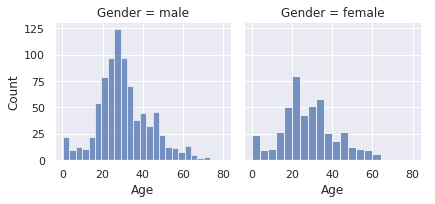

In [286]:
# your code here
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.histplot, "Age")
g.add_legend()